# Autoencoders
### EQP0046 - Introdução a Machine Learning
### Aluno: Nícolas Lima Anése
### Professores: Marcelo Farenzena e Jorge Otávio Trierweiler


### 1. Importando bibliotecas

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist, mnist
from tensorflow.keras.models import Model

### 2. Importando conjunto de dados (MNIST)

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Escalonando conjunto de dados para o intervalo [0,1]
x_train = x_train.astype('float32') / 255. 
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


### 3. Autoencoder raso

In [3]:
# Vamos criar um autoencoder raso, com apenas 1 camada oculta (apenas a camada do espaço latente)
# A ideia é ler as imagens 28x28 do MNIST, converter ao espaço latente, e depois trazer de volta para 28x28

class ShallowAutoencoder(Model):
    # Classe herda a classe tf.keras.Model
    def __init__(self, latent_dim, input_shape):
        # Usando super para trazer os métodos e propriedades da classe Model
        super(ShallowAutoencoder, self).__init__()

        # Definindo a dimensão do espaço latente e a forma do input como propriedades
        self.latent_dim = latent_dim
        self.input_shape = input_shape

        # Definindo o encoder
        self.encoder = tf.keras.Sequential([
            tf.keras.Input(shape=input_shape),
            layers.Flatten(), # Converte 28x28 em 784
            layers.Dense(latent_dim, activation='relu')
        ])

        # Definindo o decoder
        self.decoder = tf.keras.Sequential([
            tf.keras.Input(shape=(latent_dim,)),
            layers.Dense(tf.math.reduce_prod(input_shape).numpy(), activation='sigmoid'), # Converte 784 em 28x28
            layers.Reshape(input_shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [4]:
# Definindo input e dimensão do espaço latente
input_shape = x_test.shape[1:]
latent_dim = 16
autoencoder = ShallowAutoencoder(latent_dim, input_shape)

# Compilando
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.summary()

Model: "shallow_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ (None, 28, 28)         │        13,328 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,888 (101.12 KB)

 Trainable params: 25,888 (101.12 KB)

 Non-trainable params: 0 (0.00 B)

In [5]:
# Treinando
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 696us/step - loss: 0.0628 - val_loss: 0.0268
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 612us/step - loss: 0.0260 - val_loss: 0.0235
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 631us/step - loss: 0.0235 - val_loss: 0.0222
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - loss: 0.0224 - val_loss: 0.0218
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 636us/step - loss: 0.0221 - val_loss: 0.0215
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 617us/step - loss: 0.0219 - val_loss: 0.0213
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 654us/step - loss: 0.0218 - val_loss: 0.0212
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 639us/step - loss: 0.0216 - val_loss: 0.0211
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 661us/step - loss: 0.0216 - val_loss: 0.0210
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 623us/step - loss: 0.0215 - val_loss: 0.0210


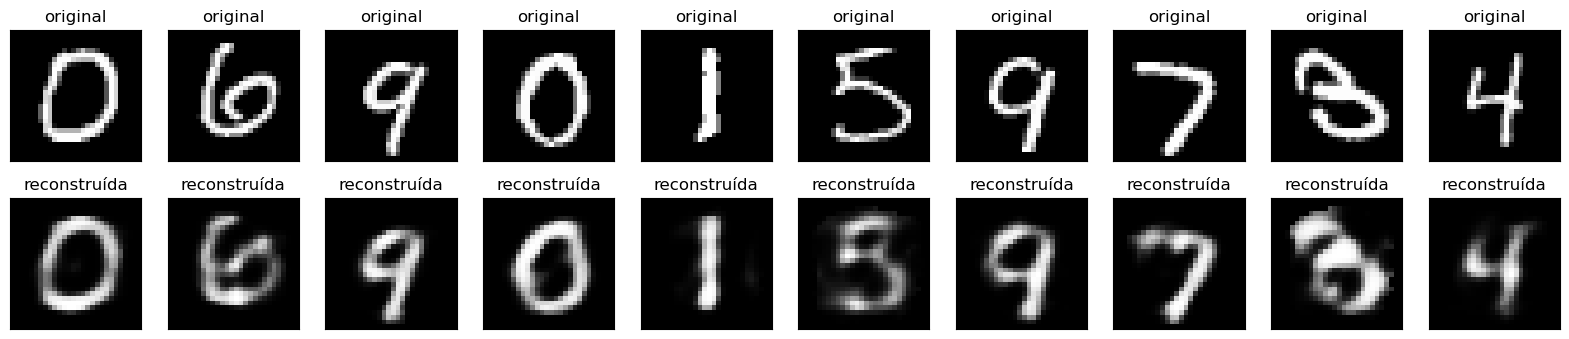

In [6]:
# Visualizando resultados
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

ni = 10
nf = 20
plt.figure(figsize=(20, 4))
for i in range(nf-ni):
    # mostrar original
    ax = plt.subplot(2, nf-ni, i + 1)
    plt.imshow(x_test[i+ni])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # mostrar reconstrução
    ax = plt.subplot(2, nf-ni, i + 1 + nf-ni)
    plt.imshow(decoded_imgs[i+ni])
    plt.title("reconstruída")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 4. Autoencoder profundo

In [7]:
# Agora vamos criar um autoencoder profundo

class DeepAutoencoder(Model):
    # Classe herda a classe tf.keras.Model
    def __init__(self, n1, n2, latent_dim, input_shape):
        # Usando super para trazer os métodos e propriedades da classe Model
        super(DeepAutoencoder, self).__init__()

        # Definindo a dimensão do espaço latente e a forma do input como propriedades
        self.latent_dim = latent_dim
        self.input_shape = input_shape

        # Definindo o encoder
        self.encoder = tf.keras.Sequential([
            tf.keras.Input(shape=input_shape),
            layers.Flatten(), # Converte 28x28 em 784
            layers.Dense(n1, activation='relu'),
            layers.Dense(n2, activation='relu'),
            layers.Dense(latent_dim, activation='relu')
        ])

        # Definindo o decoder
        self.decoder = tf.keras.Sequential([
            tf.keras.Input(shape=(latent_dim,)),
            layers.Dense(n2, activation='relu'),
            layers.Dense(n1, activation='relu'),
            layers.Dense(tf.math.reduce_prod(input_shape).numpy(), activation='sigmoid'), # Converte 784 em 28x28
            layers.Reshape(input_shape)
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [8]:
# Definindo input e dimensão do espaço latente
input_shape = x_test.shape[1:]
n1 = 64
n2 = 32
latent_dim = 16
autoencoder = DeepAutoencoder(n1, n2, latent_dim, input_shape)

# Compilando
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.summary()

Model: "deep_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 16)             │        52,848 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_3 (Sequential)       │ (None, 28, 28)         │        53,616 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106,464 (415.88 KB)

 Trainable params: 106,464 (415.88 KB)

 Non-trainable params: 0 (0.00 B)

In [9]:
# Treinando
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 981us/step - loss: 0.0553 - val_loss: 0.0248
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 858us/step - loss: 0.0237 - val_loss: 0.0203
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 817us/step - loss: 0.0201 - val_loss: 0.0184
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 822us/step - loss: 0.0185 - val_loss: 0.0175
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - loss: 0.0175 - val_loss: 0.0168
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 815us/step - loss: 0.0169 - val_loss: 0.0162
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 828us/step - loss: 0.0163 - val_loss: 0.0158
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 820us/step - loss: 0.0160 - val_loss: 0.0157
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 837us/step - loss: 0.0158 - val_loss: 0.0152
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 2s 908us/step - loss: 0.0155 - val_loss: 0.0151


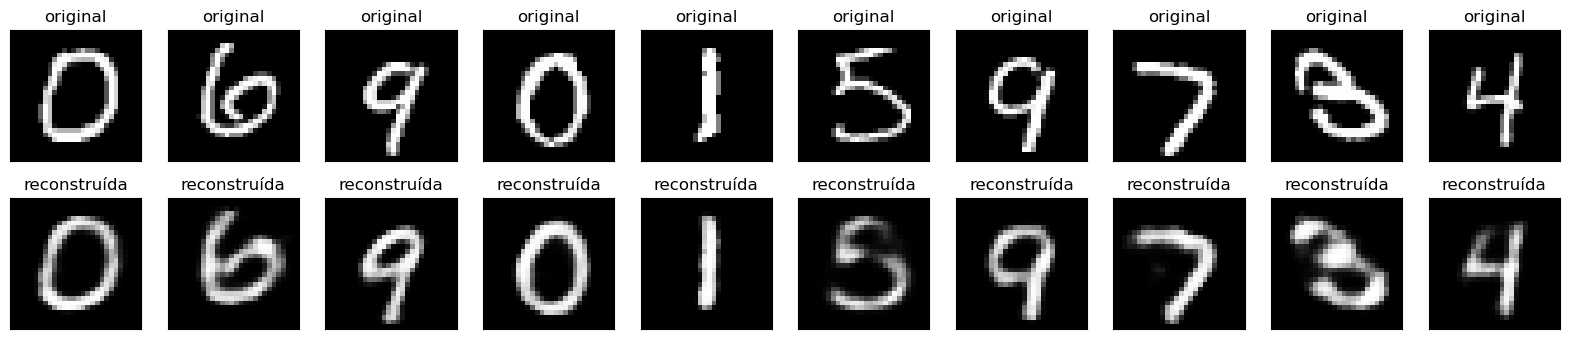

In [10]:
# Visualizando resultados
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

ni = 10
nf = 20
plt.figure(figsize=(20, 4))
for i in range(nf-ni):
    # mostrar original
    ax = plt.subplot(2, nf-ni, i + 1)
    plt.imshow(x_test[i+ni])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # mostrar reconstrução
    ax = plt.subplot(2, nf-ni, i + 1 + nf-ni)
    plt.imshow(decoded_imgs[i+ni])
    plt.title("reconstruída")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 5. Autoencoder convolucional

In [11]:
# Vamos criar um autoencoder convolucional

class ConvAutoencoder(Model):
    # Classe herda a classe tf.keras.Model
    def __init__(self, n1, n2):
        # Usando super para trazer os métodos e propriedades da classe Model
        super(ConvAutoencoder, self).__init__()

        # Definindo o encoder
        self.encoder = tf.keras.Sequential([
            tf.keras.Input(shape=(28, 28, 1)),
            layers.Conv2D(n1, (3, 3), activation='relu', padding='same', strides=2),
            layers.Conv2D(n2, (3, 3), activation='relu', padding='same', strides=2),
        ])

        # Definindo o decoder
        self.decoder = tf.keras.Sequential([
            tf.keras.Input(shape=(7, 7, n2)),
            layers.Conv2DTranspose(n2, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2DTranspose(n1, kernel_size=3, strides=2, activation='relu', padding='same'),
            layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
        ])

    def call(self, x):
        encoded = self.encoder(x)
        decoded = self.decoder(encoded)
        return decoded

In [12]:
# Definindo input e dimensão do espaço latente
n1, n2 = 16, 8
autoencoder = ConvAutoencoder(n1, n2)

# Compilando
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.summary()

Model: "conv_autoencoder"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_4 (Sequential)       │ (None, 7, 7, 8)        │         1,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_5 (Sequential)       │ (None, 28, 28, 1)      │         1,897 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
# Treinando
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - loss: 0.0375 - val_loss: 0.0017
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0011 - val_loss: 9.9274e-04
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 9.8074e-04 - val_loss: 8.4546e-04
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 8.3862e-04 - val_loss: 7.7170e-04
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 7.7667e-04 - val_loss: 7.3320e-04
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.3800e-04 - val_loss: 6.9894e-04
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 7.0539e-04 - val_loss: 6.8853e-04
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.8258e-04 - val_loss: 6.5124e-04
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 6.6110e-04 - val_loss: 6.3798e-04


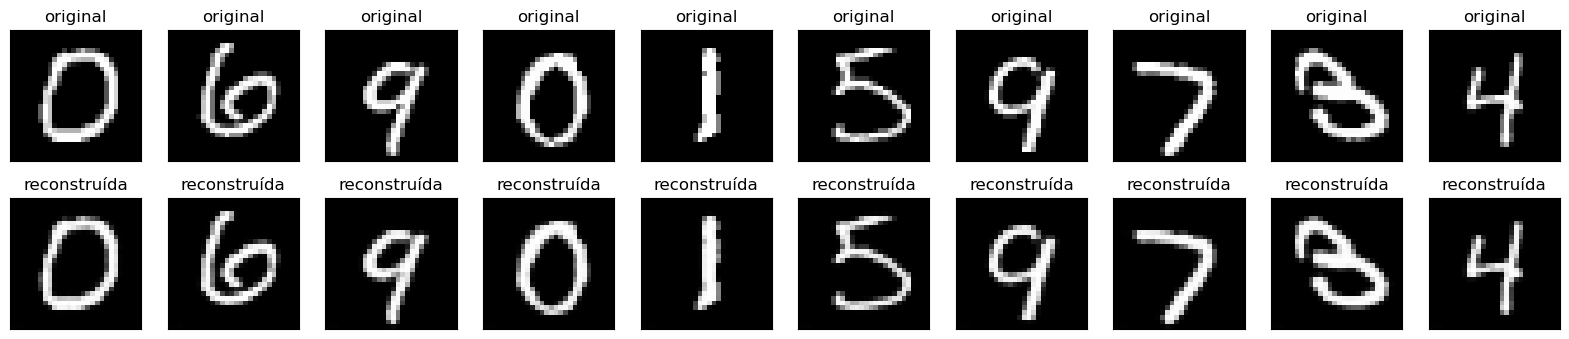

In [14]:
# Visualizando resultados
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

ni = 10
nf = 20
plt.figure(figsize=(20, 4))
for i in range(nf-ni):
    # mostrar original
    ax = plt.subplot(2, nf-ni, i + 1)
    plt.imshow(x_test[i+ni])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # mostrar reconstrução
    ax = plt.subplot(2, nf-ni, i + 1 + nf-ni)
    plt.imshow(decoded_imgs[i+ni])
    plt.title("reconstruída")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

### 6. Autoencoder para remoção de ruído

In [15]:
# Importando o banco de dados de roupas

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [16]:
noise_factor = 0.3
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape)
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape)

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

In [17]:
# Definindo input e dimensão do espaço latente
n1, n2 = 16, 8
autoencoder = ConvAutoencoder(n1, n2)

# Compilando
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

autoencoder.summary()

Model: "conv_autoencoder_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_6 (Sequential)       │ (None, 7, 7, 8)        │         1,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_7 (Sequential)       │ (None, 28, 28, 1)      │         1,897 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,217 (12.57 KB)

 Trainable params: 3,217 (12.57 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
# Treinando
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0403 - val_loss: 0.0129
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0126 - val_loss: 0.0122
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0120 - val_loss: 0.0117
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0116 - val_loss: 0.0114
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0113 - val_loss: 0.0112
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0112 - val_loss: 0.0110
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0110 - val_loss: 0.0110
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 0.0109 - val_loss: 0.0108
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 0.0107 - val_loss: 0.0107


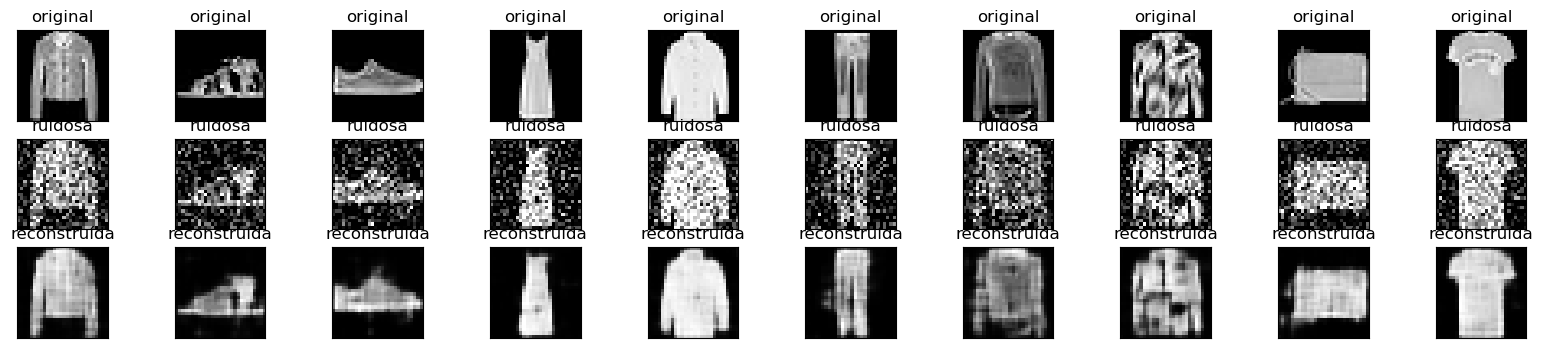

In [19]:
# Visualizando resultados
encoded_imgs = autoencoder.encoder(x_test_noisy).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

ni = 10
nf = 20
plt.figure(figsize=(20, 4))
for i in range(nf-ni):
    # mostrar original
    ax = plt.subplot(3, nf-ni, i + 1)
    plt.imshow(x_test[i+ni])
    plt.title("original")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    ax = plt.subplot(3, nf-ni, i + 1 + nf-ni)
    plt.imshow(x_test_noisy[i+ni])
    plt.title("ruidosa")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # mostrar reconstrução
    ax = plt.subplot(3, nf-ni, i + 1 + 2*(nf-ni))
    plt.imshow(decoded_imgs[i+ni])
    plt.title("reconstruída")
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()